In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('MPG.csv')

In [9]:
pd.pandas.set_option ('display.max_columns', None)
pd.pandas.set_option ('display.max_rows', None)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   HorsePower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Year          398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car_type      398 non-null    int64  
 9   Car_name      398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [34]:
df.describe()

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Year,Origin,Car_type
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [11]:
df.shape

(398, 10)

In [12]:
df.isnull().any()

MPG             False
Cylinders       False
Displacement    False
HorsePower       True
Weight          False
Acceleration    False
Year            False
Origin          False
Car_type        False
Car_name        False
dtype: bool

In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
HorsePower      6
Weight          0
Acceleration    0
Year            0
Origin          0
Car_type        0
Car_name        0
dtype: int64

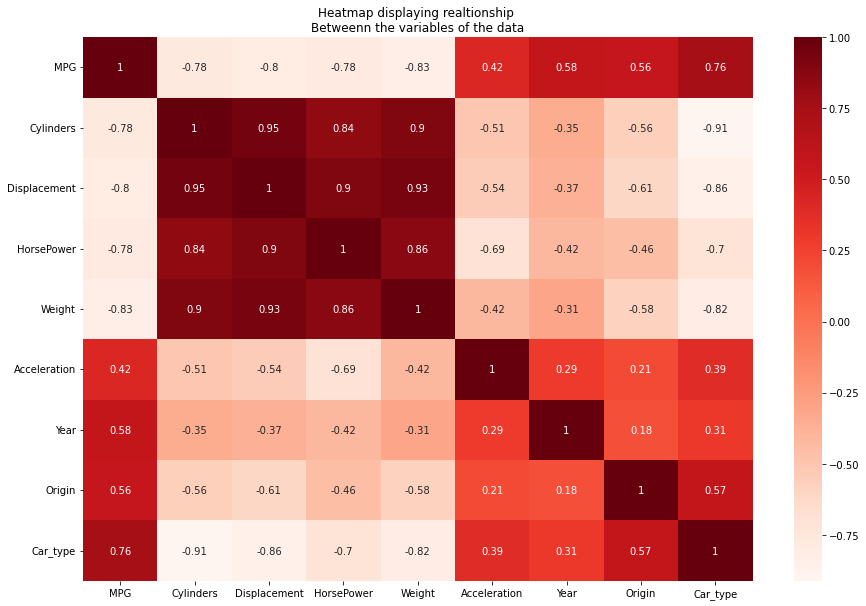

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying realtionship \nBetweenn the variables of the data',fontsize=12)
plt.show()

C:\Users\nithish\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

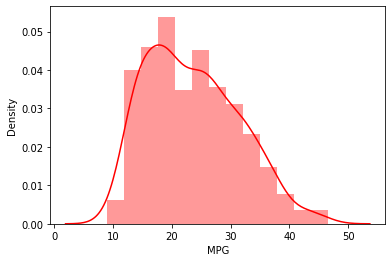

In [15]:
sns.distplot(df['MPG'],color = 'red')

In [16]:
numerical_variables = df.select_dtypes(include=[np.number])
numerical_variables.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
HorsePower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin            int64
Car_type          int64
dtype: object

In [17]:
corr = numerical_variables.corr()

## **Missing Value Treatment**

In [18]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

HorsePower: 0.0151% missing value


In [19]:
## Replacing the numerical Missing Values 
## When there are outliers it is always preferred to replace them only with median or mode

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value = df[feature].median()
    
    ## create a new feature to capture nan values
    ## If there is nan value - 1, else
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

HorsePower    0
dtype: int64

In [20]:
df.isnull().sum()

MPG              0
Cylinders        0
Displacement     0
HorsePower       0
Weight           0
Acceleration     0
Year             0
Origin           0
Car_type         0
Car_name         0
HorsePowernan    0
dtype: int64

# ****Training the model****


In [21]:
train_data = df.select_dtypes(include = [np.number])

In [22]:
train_data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'HorsePower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'Car_type', 'HorsePowernan'],
      dtype='object')

In [23]:
train_data.shape

(398, 10)

In [24]:
train_data.isnull().any()

MPG              False
Cylinders        False
Displacement     False
HorsePower       False
Weight           False
Acceleration     False
Year             False
Origin           False
Car_type         False
HorsePowernan    False
dtype: bool

In [26]:
y = train_data['MPG']
from sklearn.model_selection import train_test_split

In [27]:
X = train_data.drop(['MPG'],axis=1)
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
score = linear_reg.score(x_test,y_test)
percent = round(score,2)
print("accuracy of the model = ",percent*100,"%")

accuracy of the model =  87.0 %
